In [35]:
from matplotlib import pyplot as plt
import numpy as np


In [36]:
%run ~/github/Virgo/programs/readtablesv2.py

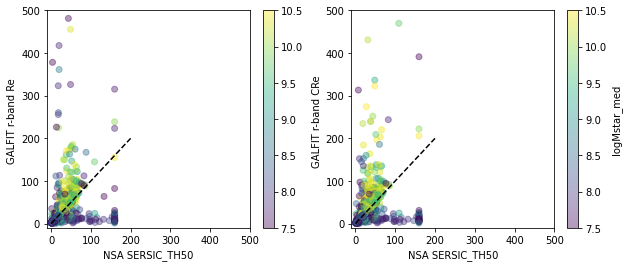

In [8]:
# galfit r-band vs NSA

leg_pixscale = 0.262
y = v.galfit_r['RE']*leg_pixscale
x = v.nsav0['SERSIC_TH50']

xmin=-10
xmax=500

flag = (v.nsav0['SERSIC_TH50'] > 0) & (v.galfit_r['MAG'] > 0) & ~v.galfit_r['Numerical_Error']
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x[flag],y[flag],alpha=0.4,c=v.magphys['logMstar_med'][flag],vmin=7.5,vmax=10.5)#c=v.ephot['GROUP_MULT'],
plt.colorbar()
plt.axis([xmin,xmax,xmin,xmax])
plt.xlabel('NSA SERSIC_TH50')
plt.ylabel('GALFIT r-band Re ')
xline = np.linspace(0,200)
plt.plot(xline,xline,'k--')

y = v.galfit_r['CRE']*leg_pixscale
x = v.nsav0['SERSIC_TH50']
flag = (v.nsav0['SERSIC_TH50'] > 0) & (v.galfit_r['MAG'] > 0) & ~v.galfit_r['CNumerical_Error']
plt.subplot(1,2,2)
plt.scatter(x[flag],y[flag],alpha=0.4,c=v.magphys['logMstar_med'][flag],vmin=7.5,vmax=10.5)#c=v.ephot['GROUP_MULT'],
plt.colorbar(label='logMstar_med')

plt.axis([xmin,xmax,xmin,xmax])
plt.xlabel('NSA SERSIC_TH50')
plt.ylabel('GALFIT r-band CRe ')

xline = np.linspace(0,200)
plt.plot(xline,xline,'k--')

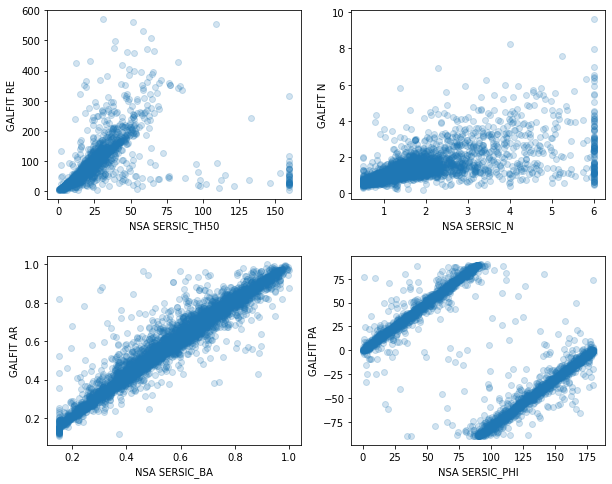

In [22]:
# all shape params
xcol = ['SERSIC_TH50','SERSIC_N','SERSIC_BA','SERSIC_PHI']
ycol = ['RE','N','AR','PA']
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=.3)
flag = (v.nsav0['SERSIC_TH50'] > 0) & (v.galfit_r['MAG'] > 0) & ~v.galfit_r['Numerical_Error']
flag = flag & (v.galfit_r['RE'] < 150/leg_pixscale)
for i in range(len(xcol)):
    plt.subplot(2,2,i+1)
    plt.scatter(v.nsav0[xcol[i]][flag],v.galfit_r[ycol[i]][flag],alpha=.2)
    plt.ylabel('GALFIT '+ycol[i])
    plt.xlabel('NSA '+xcol[i])

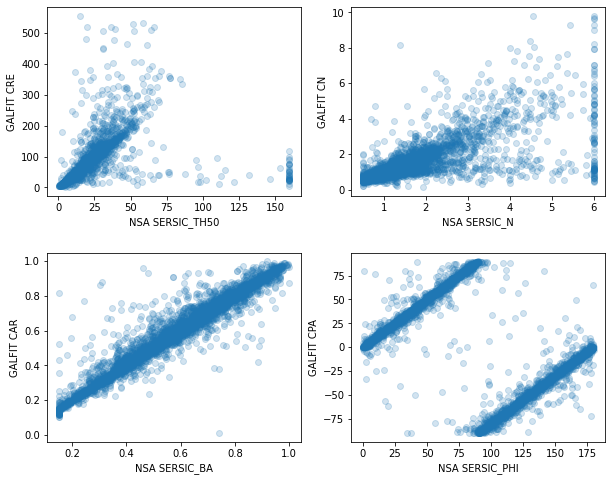

In [20]:
# all shape params
xcol = ['SERSIC_TH50','SERSIC_N','SERSIC_BA','SERSIC_PHI']
ycol = ['CRE','CN','CAR','CPA']
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=.3)
flag = (v.nsav0['SERSIC_TH50'] > 0) & (v.galfit_r['MAG'] > 0) & ~v.galfit_r['CNumerical_Error']
flag = flag & (v.galfit_r['CRE'] < 150/leg_pixscale)
for i in range(len(xcol)):
    plt.subplot(2,2,i+1)
    plt.scatter(v.nsav0[xcol[i]][flag],v.galfit_r[ycol[i]][flag],alpha=.2)
    plt.ylabel('GALFIT '+ycol[i])
    plt.xlabel('NSA '+xcol[i])

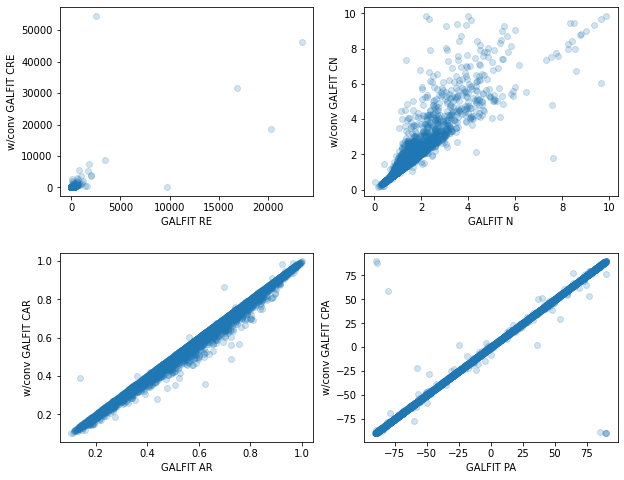

In [27]:
# compare galfit with and w/out convolution

xcol = ['RE','N','AR','PA']
ycol = ['CRE','CN','CAR','CPA']
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=.3)
flag = (v.galfit_r['CMAG'] > 0) & (v.galfit_r['MAG'] > 0)
flag = flag & ~v.galfit_r['CNumerical_Error'] & ~v.galfit_r['Numerical_Error']
#flag = flag & (v.galfit_r['RE'] < 500) & (v.galfit_r['CRE'] < 500)
for i in range(len(xcol)):
    plt.subplot(2,2,i+1)
    plt.scatter(v.galfit_r[xcol[i]][flag],v.galfit_r[ycol[i]][flag],alpha=.2)
    plt.ylabel('w/conv GALFIT '+ycol[i])
    plt.xlabel('GALFIT '+xcol[i])

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


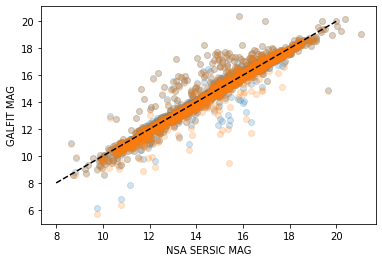

In [34]:
x = 22.5 - 2.5*np.log10(v.nsav0['SERSICFLUX'][:,4])
y1 = v.galfit_r['MAG']
y2 = v.galfit_r['CMAG']
flag = (v.galfit_r['CMAG'] > 0) & (v.galfit_r['MAG'] > 0)
flag = flag & ~v.galfit_r['CNumerical_Error'] & ~v.galfit_r['Numerical_Error']
plt.scatter(x[flag],y1[flag],alpha=.2,label='MAG')
plt.scatter(x[flag],y2[flag],alpha=.2,label='CMAG')

plt.xlabel("NSA SERSIC MAG")
plt.ylabel("GALFIT MAG")
xline = np.linspace(8,20,100)
plt.plot(xline,xline,'k--')

Text(0.5, 0, 'GALFIT Magnitude')

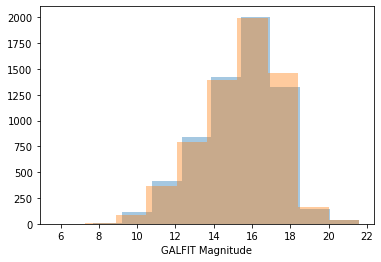

In [40]:
# histogram of magnitudes

plt.figure()
y1 = v.galfit_r['MAG']
y2 = v.galfit_r['CMAG']

flag = (v.galfit_r['CMAG'] > 0) & (v.galfit_r['MAG'] > 0)
flag = flag & ~v.galfit_r['CNumerical_Error'] & ~v.galfit_r['Numerical_Error']
plt.hist(y1[flag],alpha=.4)
plt.hist(y2[flag],alpha=.4)
plt.xlabel('GALFIT Magnitude')

In [2]:
%run ~/github/Virgo/programs/readtablesv2.py

In [18]:
v.galfit_W1.colnames

['VFID',
 'XC',
 'XC_ERR',
 'YC',
 'YC_ERR',
 'MAG',
 'MAG_ERR',
 'RE',
 'RE_ERR',
 'N',
 'N_ERR',
 'AR',
 'AR_ERR',
 'PA',
 'PA_ERR',
 'SKY',
 'SKY_ERR',
 'CHI2NU',
 'CXC',
 'CXC_ERR',
 'CYC',
 'CYC_ERR',
 'CMAG',
 'CMAG_ERR',
 'CRE',
 'CRE_ERR',
 'CN',
 'CN_ERR',
 'CAR',
 'CAR_ERR',
 'CPA',
 'CPA_ERR',
 'CSKY',
 'CSKY_ERR',
 'CCHI2NU',
 'Numerical_Error',
 'CNumerical_Error']

In [17]:
# number of failures
print("W1 results:")
print("------------")
print(f"number of errors w/out convolution: {np.sum(v.galfit_W1['Numerical_Error'])/len(v.galfit_W1):.03f}")
print(f"number of errors with convolution: {np.sum(v.galfit_W1['CNumerical_Error'])/len(v.galfit_W1):.03f}")

W1 results:
------------
number of errors w/out convolution: 0.033
number of errors with convolution: 0.154


In [19]:
W1galfitflag = v.galfit_W1['MAG'] > 0

In [21]:
len(v.galfit_W1) - np.sum(W1galfitflag)

293

In [30]:
%run ~/github/Virgo/programs/readtablesv2.py

In [26]:
# number of failures
print("W1 results:")
print("------------")
W1galfitflag = v.galfitW1['MAG'] > 0
nflag = v.galfitW1['Numerical_Error']
cnflag = v.galfitW1['CNumerical_Error']
print(f"percent success w/out convolution: {np.sum(W1galfitflag & ~nflag)/len(v.galfitW1):.03f}")
print(f"percent success with convolution: {np.sum(W1galfitflag & ~cnflag)/len(v.galfitW1):.03f}")

W1 results:
------------
percent success w/out convolution: 0.924
percent success with convolution: 0.803


In [32]:
# number of failures
print("W1 fixedBA results:")
print("------------")
W1galfitflag = v.galfitW1fixBA['MAG'] > 0
nflag = v.galfitW1fixBA['Numerical_Error']
cnflag = v.galfitW1fixBA['CNumerical_Error']
print(f"percent success w/out convolution: {np.sum(W1galfitflag & ~nflag)/len(v.galfitW1):.03f}")
print(f"percent success with convolution: {np.sum(W1galfitflag & ~cnflag)/len(v.galfitW1):.03f}")

W1 fixedBA results:
------------
percent success w/out convolution: 0.926
percent success with convolution: 0.854


In [28]:
# number of failures
print("W3 results:")
print("------------")
W3galfitflag = v.galfitW3['MAG'] > 0
nflag = v.galfitW3['Numerical_Error']
cnflag = v.galfitW3['CNumerical_Error']
print(f"percent success w/out convolution: {np.sum(W3galfitflag & ~nflag)/len(v.galfitW1):.03f}")
print(f"percent success with convolution: {np.sum(W3galfitflag & ~cnflag)/len(v.galfitW1):.03f}")

W3 results:
------------
percent success w/out convolution: 0.542
percent success with convolution: 0.350


In [31]:
# number of failures
print("W3 fixedBA results:")
print("------------")
W3galfitflag = v.galfitW3fixBA['MAG'] > 0
nflag = v.galfitW3fixBA['Numerical_Error']
cnflag = v.galfitW3fixBA['CNumerical_Error']
print(f"percent success w/out convolution: {np.sum(W3galfitflag & ~nflag)/len(v.galfitW1):.03f}")
print(f"percent success with convolution: {np.sum(W3galfitflag & ~cnflag)/len(v.galfitW1):.03f}")

W3 fixedBA results:
------------
percent success w/out convolution: 0.637
percent success with convolution: 0.464


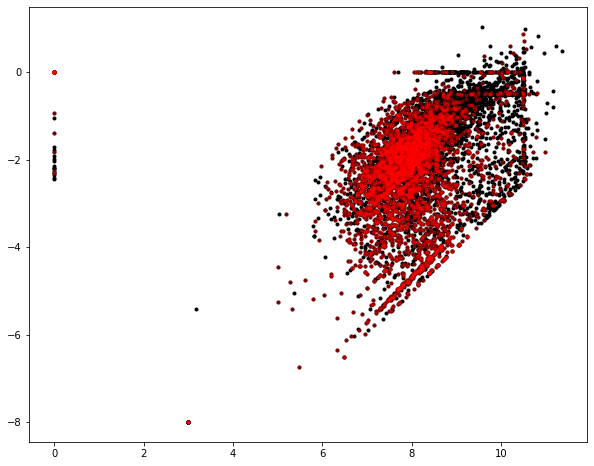

In [40]:
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']
plt.figure(figsize=(10,8))
plt.plot(x,y,'k.')
flag1 = v.galfitW3fixBA['CNumerical_Error']
plt.plot(x[flag1],y[flag1],'r.',alpha=.4)

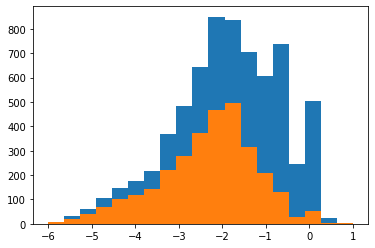

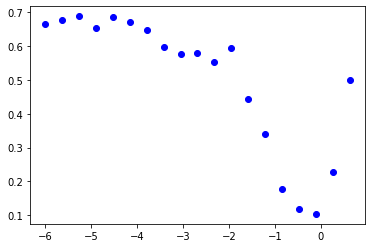

In [54]:
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']
plt.figure(figsize=(6,4))
mybins=np.linspace(-6,1,20)
t1 = plt.hist(y,bins=mybins)
flag1 = v.galfitW3fixBA['CNumerical_Error']
t2 = plt.hist(y[flag1],bins=mybins)#,'r.',alpha=.4)

# 

plt.figure()

fraction_bad = t2[0]/t1[0]
plt.plot(t1[1][0:-1],fraction_bad,'bo')

In [97]:
snrtab = Table.read("/home/rfinn/research/Virgo/tables-north/v2_snrcoadd.fits")
snrtab.colnames
masslimit = 8.26
massflag = v.magphys['logMstar_med'] > masslimit
sfrflag = v.magphys['logSFR_med'] >-1.398
kimflag = (snrtab['snr15_flag'] | snrtab['snr30_flag']) & snrtab['t_flag'] & massflag & sfrflag

Text(0.5, 1.0, 'free parameters')

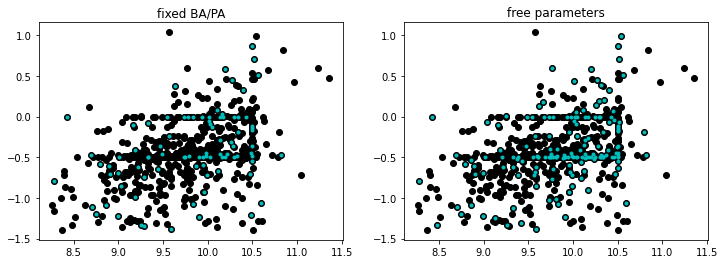

In [98]:
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3fixBA['CNumerical_Error']
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
plt.title("fixed BA/PA")

plt.subplot(1,2,2)
flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3['CNumerical_Error']
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
plt.title("free parameters")

In [84]:
flag2 = ~v.galfitW3['CNumerical_Error'] & v.galfitW3fixBA['CNumerical_Error']
print(np.sum(flag2 & flag0))

21


In [77]:
v.galfitW3.colnames

['VFID',
 'XC',
 'XC_ERR',
 'YC',
 'YC_ERR',
 'MAG',
 'MAG_ERR',
 'RE',
 'RE_ERR',
 'N',
 'N_ERR',
 'AR',
 'AR_ERR',
 'PA',
 'PA_ERR',
 'SKY',
 'SKY_ERR',
 'CHI2NU',
 'CXC',
 'CXC_ERR',
 'CYC',
 'CYC_ERR',
 'CMAG',
 'CMAG_ERR',
 'CRE',
 'CRE_ERR',
 'CN',
 'CN_ERR',
 'CAR',
 'CAR_ERR',
 'CPA',
 'CPA_ERR',
 'CSKY',
 'CSKY_ERR',
 'CCHI2NU',
 'Numerical_Error',
 'CNumerical_Error']

Text(0, 0.5, 'Sersic CN fixed BA')

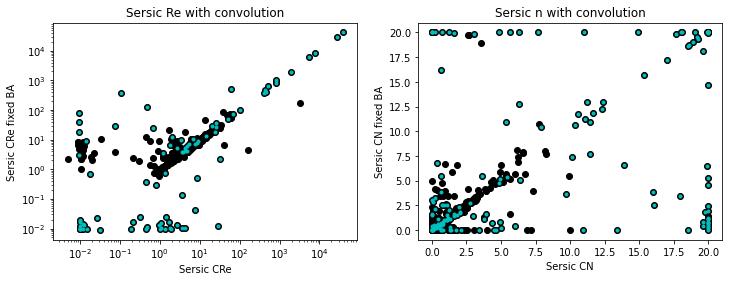

In [99]:
x = v.galfitW3['CRE']
xerr = v.galfitW3['CRE_ERR']
y = v.galfitW3fixBA['CRE']
yerr = v.galfitW3fixBA['CRE_ERR']
masslimit = 8.26
massflag = v.magphys['logMstar_med'] > masslimit
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3fixBA['CNumerical_Error']
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
plt.title("Sersic Re with convolution")
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel("Sersic CRe")
plt.ylabel("Sersic CRe fixed BA")
plt.subplot(1,2,2)

x = v.galfitW3['CN']
xerr = v.galfitW3['CN_ERR']
y = v.galfitW3fixBA['CN']
yerr = v.galfitW3fixBA['CN_ERR']

flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3['CNumerical_Error']
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
plt.title("Sersic n with convolution")
plt.xlabel("Sersic CN")
plt.ylabel("Sersic CN fixed BA")

number with W3 num error =  159
number with W3 failed galfit  =  15
sample size =  708
sample size =  682


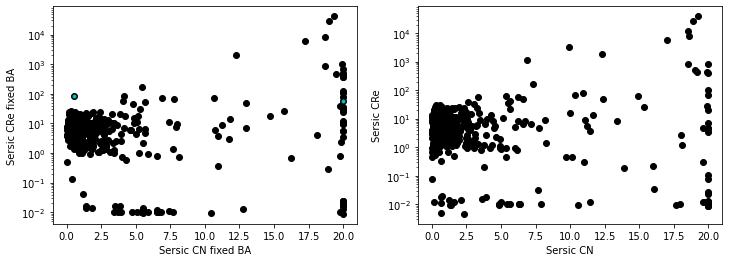

In [110]:
x = v.galfitW3fixBA['CN']
xerr = v.galfitW3fixBA['CN_ERR']
y = v.galfitW3fixBA['CRE']
yerr = v.galfitW3fixBA['CRE_ERR']
masslimit = 8.26
massflag = v.magphys['logMstar_med'] > masslimit
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3fixBA['CNumerical_Error']
galfit_failure = v.galfitW3['CMAG'] == 0
flag1 = flag1 & galfit_failure
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
#plt.title("Sersic Re with convolution")
#plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel("Sersic CN fixed BA")
plt.ylabel("Sersic CRe fixed BA")
plt.subplot(1,2,2)

x = v.galfitW3['CN']
xerr = v.galfitW3['CN_ERR']
y = v.galfitW3['CRE']
yerr = v.galfitW3['CRE_ERR']

flag0 = kimflag & massflag
plt.plot(x[flag0],y[flag0],'ko')
flag1 = v.galfitW3['CNumerical_Error']
flag3 = v.galfitW1['CNumerical_Error']

galfit_failure = v.galfitW3['CMAG'] == 0
print("number with W3 num error = ",np.sum(flag1 & kimflag))
print("number with W3 failed galfit  = ",np.sum(galfit_failure & kimflag))
flag1 = flag1 & galfit_failure
plt.plot(x[flag1 & flag0],y[flag1 & flag0],'c.',alpha=1)
print("sample size = ",np.sum(flag0 ))
print("sample size = ",np.sum(flag0 & ~flag1 & ~flag3))
#plt.title("Sersic n with convolution")
plt.xlabel("Sersic CN")
plt.ylabel("Sersic CRe")
plt.gca().set_yscale('log')

In [103]:
newflag = flag0 & (flag1 | flag3)
print("sample size = ",np.sum(newflag))
print(v.galfitW3fixBA['CRE'][newflag])

sample size =  167
  CRE  
-------
 0.5009
 0.0196
    0.0
    0.0
 0.0111
  4.925
10.4775
    0.0
 4.6089
   0.01
    ...
 6.5861
 9.3198
12.4769
 38.051
460.769
    0.0
11.5223
    0.0
 8.7148
14.5529
  0.014
Length = 167 rows


In [104]:
newflag = flag0 & (flag1 | flag3)
print("sample size = ",np.sum(newflag))
print(v.galfitW3fixBA['CN'][newflag])

sample size =  167
   CN  
-------
 0.0157
19.9982
    0.0
    0.0
 7.4309
 0.3192
19.9999
    0.0
 0.5128
  5.393
    ...
  5.224
19.9985
 0.5083
19.8026
19.5058
    0.0
 1.5869
    0.0
 2.5139
 0.4258
 1.4269
Length = 167 rows


# compare sizes in W1 and W3



# Action Items

* make all web pages
* list galaxies that are cyan in the left plot
* verify that compact sources are compact.  if so, accept size and remove num error flag
* examine galaxies/fits with n > 6
* fix n=6 and rerun for galaxies with n > 6
* check galaxies in the main locus in the left panel that have num error flags
* check galaxies that fit ok in W3 but have an error in W1
* check galaxies that make Kim's sample cuts but where galfit failed